## Dependencies Installation

In [4]:
pip install opencv-python-headless


  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/20/44/458a0a135866f5e08266566b32ad9a182a7a059a894effe6c41a9c841ff1/opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.5 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.6/38.5 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.1/38.5 MB 8.1 MB/s eta 0:00:05
   - -------------------------------------- 1.3/38.5 MB 7.3 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.5 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.3/38.5 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.5 MB 8.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.5 MB 8.7 MB/s eta 0:00:05
   ---- ----------------------------------- 4.0/38.5 MB 9.0 MB/s eta 0:00:0

In [5]:
pip install opencv-contrib-python-headless



  Obtaining dependency information for opencv-contrib-python-headless from https://files.pythonhosted.org/packages/fe/b9/b3e6bf31785cd495c51a80804638c62be0f9b84346ef8134a608006b2ed0/opencv_contrib_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/45.2 MB 6.3 MB/s eta 0:00:08
    --------------------------------------- 1.0/45.2 MB 10.7 MB/s eta 0:00:05
   - -------------------------------------- 2.0/45.2 MB 15.6 MB/s eta 0:00:03
   -- ------------------------------------- 2.9/45.2 MB 16.9 MB/s eta 0:00:03
   --- ------------------------------------ 3.7/45.2 MB 18.4 MB/s eta 0:00:03
   ---- ----------------------------------- 4.7/45.2 MB 17.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.9/45.2 MB 18.9 MB/s eta 0:00:03
   ----- ---------------------------------- 6.1/45.2 MB 16.8 MB/s eta 0:00:03
   ----- ---------------------------------- 6.5/45.

In [7]:
pip install --user opencv-python



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [1]:
pip show opencv-python


Name: opencv-pythonNote: you may need to restart the kernel to use updated packages.

Version: 4.9.0.80
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\Abhay Thakur\AppData\Roaming\Python\Python311\site-packages
Requires: numpy, numpy, numpy, numpy, numpy
Required-by: 


## Data Collection (Face Sampling)


In [13]:
import cv2

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def face_extractor(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    cropped_face = None  # Initialize cropped_face variable

    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

cap = cv2.VideoCapture(0)
count = 0

output_directory = r'D:\dataset_face\train\ABHAY\face reco\dataset\testing_images\Aditya\New folder'

while True:
    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (200, 200))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        file_name_path = output_directory + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Face Cropper', face)
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 50:
        break

cap.release()
cv2.destroyAllWindows()
print('Samples Collection Completed')


Samples Collection Completed


## Transfer Learning, Data Preprocessing & Training

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"D:\dataset_face\train\ABHAY\face reco\dataset\training_images\Abhay"
valid_path = r"D:\dataset_face\train\ABHAY\face reco\dataset\testing_images\Abhay"

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob(r'D:\dataset_face\train\ABHAY\face reco\dataset\training_images\*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'D:\dataset_face\train\ABHAY\face reco\dataset\training_images',
                                                 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'D:\dataset_face\train\ABHAY\face reco\dataset\testing_images',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

## Training Evaluation

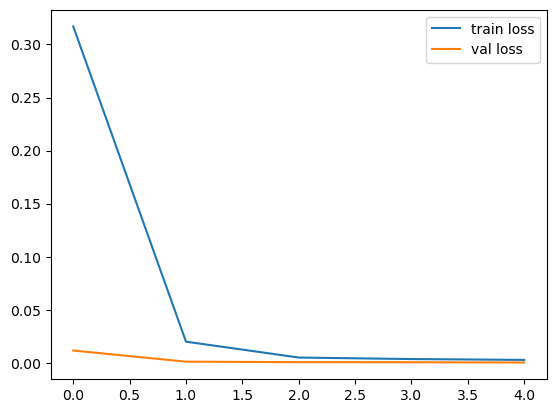

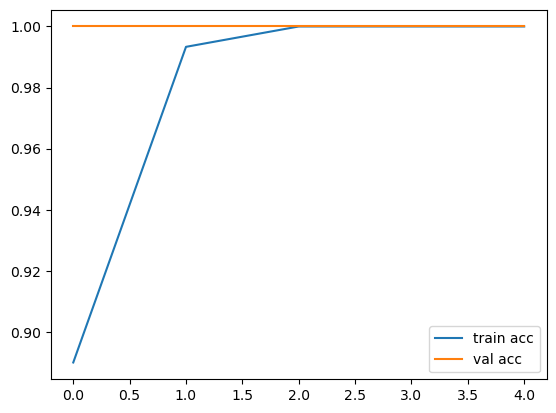

<Figure size 640x480 with 0 Axes>

In [2]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Save Model

In [3]:
import tensorflow as tf
from keras.models import load_model

# Save the model in the native Keras format (with a '.keras' extension)
model.save('face_reco_attendence_model.keras')


## Attendance System with GUI

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from datetime import datetime
import tkinter as tk
from tkinter import messagebox

import tensorflow as tf

# Suppress TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Load the trained model
model = tf.keras.models.load_model("face_reco_attendence_model.keras")

# Define the paths to the training and validation data directories
train_path = r"D:\dataset_face\train\ABHAY\face reco\dataset\training_images"
valid_path = r"D:\dataset_face\train\ABHAY\face reco\dataset\testing_images"

# Load the class names directly from the directory structure
class_names = sorted(os.listdir(train_path))

# Define the attendance file path in the user's home directory
home_directory = os.path.expanduser("~")
attendance_csv_path = os.path.join(home_directory, r'D:\dataset_face\Attendance.xlsx')

# Check if the attendance file exists
if os.path.exists(attendance_csv_path):
    # Load the existing attendance data
    attendance_df = pd.read_excel(attendance_csv_path, engine='openpyxl')
else:
    # Create a new DataFrame with columns for Name, Date, Lecture, Start Time, and End Time
    attendance_df = pd.DataFrame(columns=['Name', 'Date', 'Lecture', 'Start Time', 'End Time'])

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define lecture timings for each subject
lecture_timings = {'IN TIME': ('00:00','24:00'),                
}

# Dictionary to track attendance marking status
attendance_marked = {lecture_name: {} for lecture_name in lecture_timings}

# Function to mark attendance
def mark_attendance(name, lecture_name):
    
    global attendance_df
    now = datetime.now()
    date = now.strftime("%Y-%m-%d")
    current_time = now.strftime("%H:%M:%S")
    
    # Check if attendance has already been marked for the person during this lecture
    if name in attendance_marked[lecture_name]:
        return
    
    new_attendance_data = {'Name': [name], 'Date': [date], 'Lecture': [lecture_name],
                           'Start Time': [lecture_timings[lecture_name][0]], 'End Time': [lecture_timings[lecture_name][1]],
                           'Marked Time': [current_time]}
    new_df = pd.DataFrame(new_attendance_data)
    attendance_df = pd.concat([attendance_df, new_df], ignore_index=True)
    attendance_marked[lecture_name][name] = True  # Update attendance marking status
    # Save the updated attendance data to the Excel file
    attendance_df.to_excel(attendance_csv_path, index=False)

# Function to recognize faces and mark attendance
def recognize_and_mark_attendance():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Unable to capture frame from webcam")
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        if len(faces) > 0:
            for (x, y, w, h) in faces:
                face_roi = gray[y:y+h, x:x+w]
                face_roi = cv2.resize(face_roi, (224, 224))
                face_roi_rgb = cv2.cvtColor(face_roi, cv2.COLOR_GRAY2RGB)  # Convert to RGB
                face_roi_rgb = np.expand_dims(face_roi_rgb, axis=0) / 255.0  # Normalize
                # Recognize face
                prediction = model.predict(face_roi_rgb)
                predicted_class = np.argmax(prediction)
                confidence = prediction[0][predicted_class]
                
                if confidence > 0.95:
                    name = class_names[predicted_class]
                    cv2.putText(frame, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                    # Mark attendance for the corresponding lecture
                    for lecture_name in lecture_timings:
                        start_time, end_time = lecture_timings[lecture_name]
                        current_time = datetime.now().strftime("%H:%M:%S")
                        if start_time <= current_time < end_time:
                            mark_attendance(name, lecture_name)
        
        cv2.imshow('Face Recognition', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Create a Tkinter window
root = tk.Tk()
root.title("Face Recognition Attendance System")

# Function to start recognizing faces and marking attendance
def start_recognition():
    messagebox.showinfo("Face Recognition", "Face recognition and attendance marking started.")
    recognize_and_mark_attendance()

# Create a button to start the recognition process
start_button = tk.Button(root, text="Click here to start the process", command=start_recognition)
start_button.pack(pady=25)

# Function to quit the application
def quit_app():
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        
        root.destroy()

# Create a button to quit the application
quit_button = tk.Button(root, text="Quit", command=quit_app)
quit_button.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()


1/1 [==============================] - 0s 90ms/step
